In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, uniform, gamma

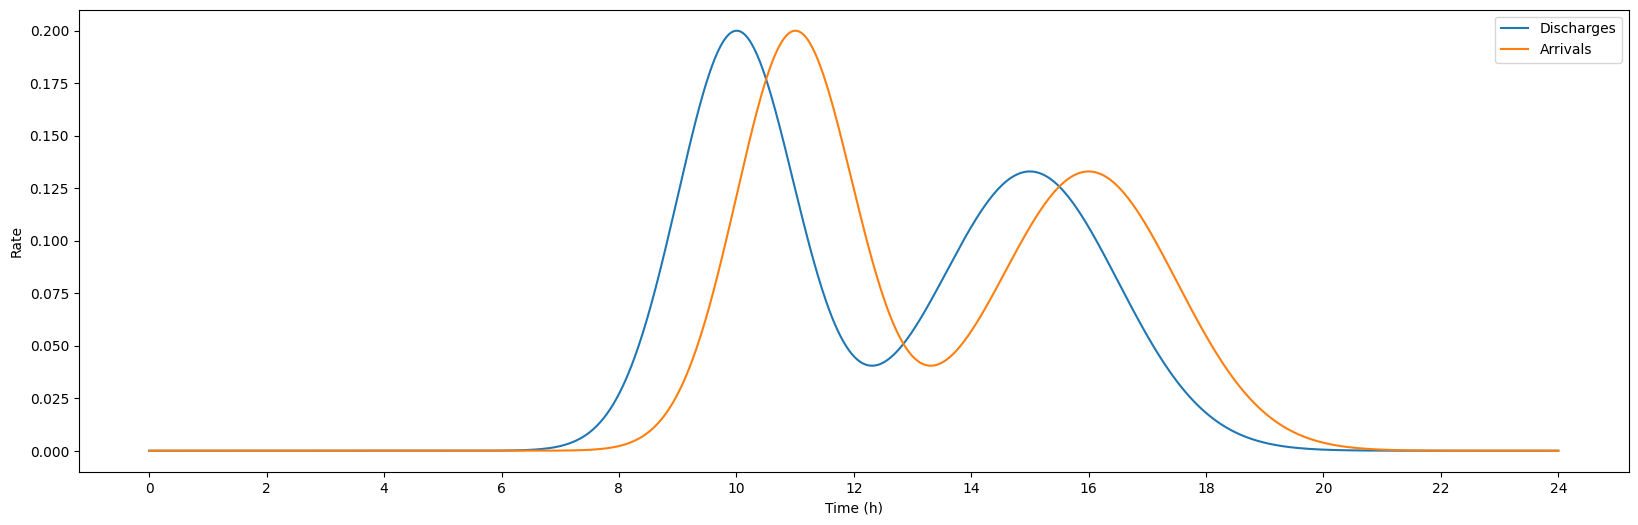

In [2]:
p_ = 0.55
t_ = np.linspace(0, 24, 1000)

class ArrivalDistribution:
    first_round_time = 9
    second_round_time = 15
    def __init__(self, p=0.5, offset=0):
        self.p = p
        self.first_peak = norm(loc=10 + offset, scale=1)
        self.second_peak = norm(loc=15 + offset, scale=1.5)

    def pdf(self, x):
        return self.p * self.first_peak.pdf(x) + (1 - self.p) * self.second_peak.pdf(x)

    def rvs(self, size=()):
        s1 = self.first_peak.rvs(size=size)
        s2 = self.second_peak.rvs(size=size)
        choice = uniform.rvs(size=size) < self.p
        return np.where(choice, s1, s2)

discharge_dist = ArrivalDistribution()
admission_dist = ArrivalDistribution(offset=1)


fig, ax = plt.subplots(1, 1, figsize=(20, 6))

ax.plot(t_, discharge_dist.pdf(t_), label="Discharges")
ax.plot(t_, admission_dist.pdf(t_), label="Arrivals")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Rate")
ax.set_xticks(np.arange(0, 25, 2), np.arange(0, 25, 2))
ax.legend()
plt.show()

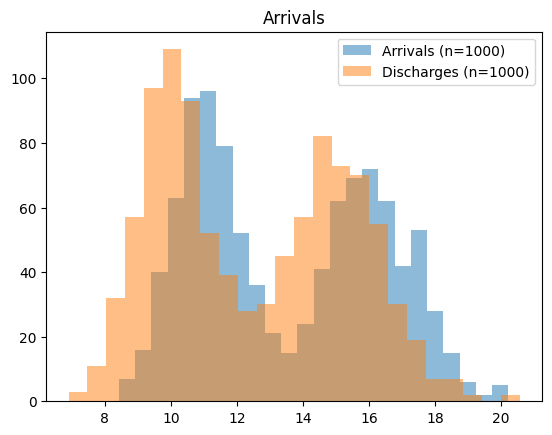

In [3]:
arrivals = admission_dist.rvs(size=1000)
discharges = discharge_dist.rvs(size=1000)

plt.title("Arrivals")
plt.hist(arrivals, alpha=0.5, bins=24, label=f"Arrivals (n={len(arrivals)})")
plt.hist(discharges, alpha=0.5, bins=24, label=f"Discharges (n={len(discharges)})")
plt.legend()
plt.show()

In [4]:
from simulation_loop import simulate_system, simulate_many, SimulationParams, plot_result

np.random.seed(42069)

def service_time_dist():
    service_min_time = 5/60
    return service_min_time + expon(scale=1/60).rvs()


def transport_time_dist(distance_meters):
    if distance_meters == 0:
        return 0
    speed_meters_per_second = 1.4
    transport_time_seconds = gamma(a=distance_meters, scale=1/speed_meters_per_second).rvs()
    return transport_time_seconds / 3600

distances = np.array([
    [10, 175, 0],
    [175, 10, 175],
    [0, 175, 10],
])

n_elevators = 1
discharge_dist = lambda: ArrivalDistribution().rvs(size=200)

params = SimulationParams(
    discharge_dist,
    service_time_dist,
    transport_time_dist,
    distances,
    arrival_weights=np.ones(n_elevators) / n_elevators,
    discharge_weights=np.ones(n_elevators) / n_elevators,
    n_elevators=n_elevators,
    n_robots=2,
)

events, data = simulate_system(params)
# discharge_dist()

# Case 1
Poisson distribution: Interarrival time of exponential distribution

In [ ]:
discharge_dist = lambda: np.cumsum(expon(scale=1/12).rvs(size=270))
plt.figure(figsize=(4, 2))
y_ = discharge_dist()
plt.plot(y_, np.arange(len(y_)), linestyle='-', label='Discharge Times')
plt.xlabel('Time (h)')
plt.ylabel('Discharge Number')
plt.title('Discharge Times Over Time')

21.710949744995318

<Figure size 400x200 with 0 Axes>

In [9]:
np.random.seed(42069)

def service_time_dist():
    service_min_time = 4/60  # 4 minutes in hours
    return service_min_time + expon(scale=1/60).rvs()


def transport_time_dist(distance_meters):
    if distance_meters == 0:
        return 0
    speed_meters_per_second = 1.4
    transport_time_seconds = gamma(a=distance_meters, scale=1/speed_meters_per_second).rvs()
    return transport_time_seconds / 3600

distances = np.array([
    [10, 175, 175],
    [175, 10, 0],
    [175, 0, 10],
])

params = SimulationParams(
    discharge_dist,
    service_time_dist,
    transport_time_dist,
    distances,
    arrival_weights=np.ones(n_elevators) / n_elevators,
    discharge_weights=np.ones(n_elevators) / n_elevators,
    n_elevators=1,
    n_robots=1,
)

# events, data = simulate_system(params)
buffers, demands, arrival_times, discharge_times, df = simulate_many(params, n_iters=10)
plot_result(params, buffers, demands, arrival_times, discharge_times)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:40<00:00,  4.03s/it]
